In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


In [2]:
primary_csv = "../Data/clean_data.csv"


In [3]:
primary_df = pd.read_csv(primary_csv)
primary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7972 entries, 0 to 7971
Data columns (total 25 columns):
Unnamed: 0    7972 non-null int64
Actors        7951 non-null object
Awards        6281 non-null object
BoxOffice     2678 non-null object
Country       7967 non-null object
DVD           6804 non-null object
Director      7964 non-null object
Genre         7957 non-null object
Language      7885 non-null object
Metascore     4906 non-null float64
Plot          7915 non-null object
Poster        7913 non-null object
Production    7047 non-null object
Rated         7125 non-null object
Ratings       7972 non-null object
Released      7864 non-null object
Runtime       7944 non-null object
Title         7972 non-null object
Website       3935 non-null object
Writer        7861 non-null object
Year          7972 non-null int64
imdbID        7972 non-null object
imdbRating    7952 non-null float64
imdbVotes     7951 non-null object
rating        7972 non-null int64
dtypes: float64(2),

In [6]:
revenues = primary_df.filter(['imdbRating', 'rating', 'BoxOffice'])

TypeError: filter() got an unexpected keyword argument 'inplace'

In [7]:
revenues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7972 entries, 0 to 7971
Data columns (total 3 columns):
imdbRating    7952 non-null float64
rating        7972 non-null int64
BoxOffice     2678 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 186.9+ KB


In [13]:
revenues.dropna(inplace=True)

In [9]:
revenues.dtypes

imdbRating    float64
rating          int64
BoxOffice      object
dtype: object

In [14]:
revenues["BoxOffice"] = revenues["BoxOffice"].str.replace("$","")

In [15]:
revenues

,imdbRating,rating,BoxOffice
0,7.3,3,"34,187,787"
2,5.8,3,"59,537,388"
3,5.8,0,"66,327,144"
6,5.7,1,"132,122,995"
8,6.7,3,"121,400,000"
9,7.2,2,"2,105,024"
10,5.5,3,"65,700,000"
12,7.6,1,"41,407,470"
13,6.1,3,"15,176,515"
14,7.1,1,"49,238,110"


In [16]:
revenues["BoxOffice"] = revenues["BoxOffice"].str.replace(",","").astype(float)

In [17]:
revenues

,imdbRating,rating,BoxOffice
0,7.3,3,34187787.0
2,5.8,3,59537388.0
3,5.8,0,66327144.0
6,5.7,1,132122995.0
8,6.7,3,121400000.0
9,7.2,2,2105024.0
10,5.5,3,65700000.0
12,7.6,1,41407470.0
13,6.1,3,15176515.0
14,7.1,1,49238110.0


In [18]:
revenues.dtypes

imdbRating    float64
rating          int64
BoxOffice     float64
dtype: object

In [19]:
revenues.mean()

imdbRating    6.643503e+00
rating        2.205377e+00
BoxOffice     5.058055e+07
dtype: float64

In [28]:
revenues.median()

imdbRating           6.7
rating               3.0
BoxOffice     20247183.5
dtype: float64

In [22]:
revenues.BoxOffice.quantile([0.25,0.5,0.75])

0.25     1541412.00
0.50    20247183.50
0.75    63985836.25
Name: BoxOffice, dtype: float64

In [24]:
ratingsgroups = revenues.groupby(['rating']).mean()
ratingsgroups

,imdbRating,BoxOffice
rating,,
0,6.704211,3.940501e+07
1,6.783488,5.593461e+07
2,6.606107,5.042394e+07
3,6.584918,4.975352e+07


In [25]:
#Creating dictionary of 'title font' for plots
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}

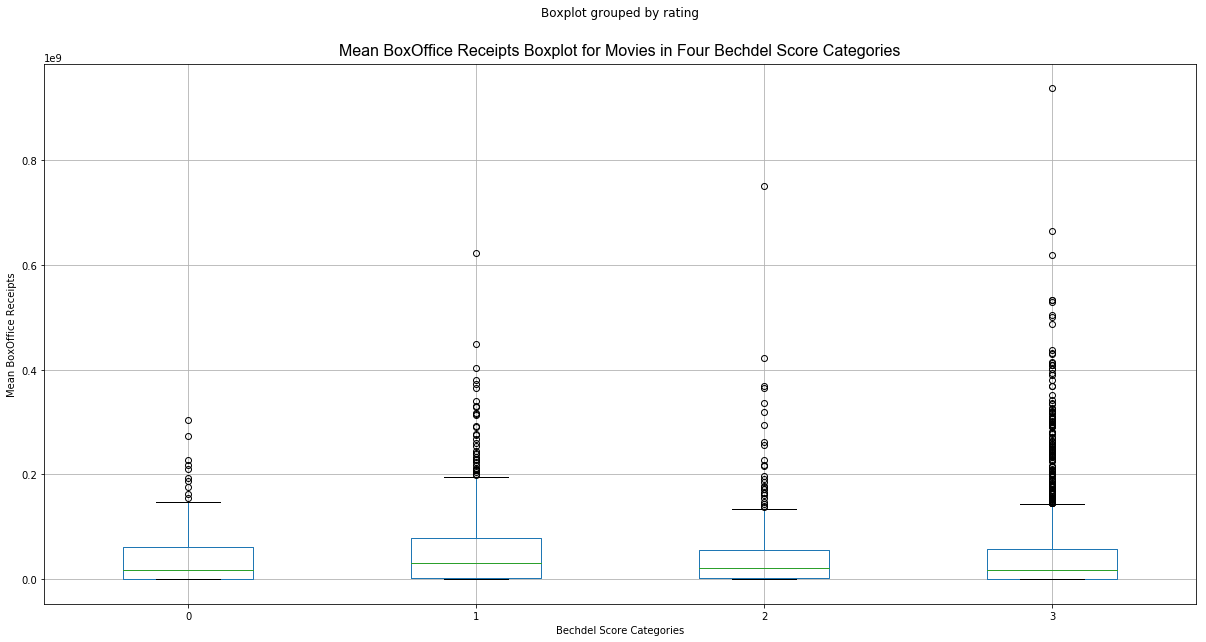

In [27]:
# Create a boxplot to compare means in route to an ANOVA on group differences in IMDB Rating means
revenues.boxplot("BoxOffice", by="rating", figsize=(20, 10))
plt.title('Mean BoxOffice Receipts Boxplot for Movies in Four Bechdel Score Categories', fontdict=title_font)
plt.ylabel('Mean BoxOffice Receipts')
plt.xlabel('Bechdel Score Categories')

plt.savefig('IMDB Revenues_boxplot.png')


In [29]:
#Because of skewness of data, creating new column that indicates where mean bechdel rating of country falls into BoxOffice Revenue quartiles.
revenues['quartile'] = pd.qcut(revenues['BoxOffice'], 4, labels=False)


In [30]:
revenues

,imdbRating,rating,BoxOffice,quartile
0,7.3,3,34187787.0,2
2,5.8,3,59537388.0,2
3,5.8,0,66327144.0,3
6,5.7,1,132122995.0,3
8,6.7,3,121400000.0,3
9,7.2,2,2105024.0,1
10,5.5,3,65700000.0,3
12,7.6,1,41407470.0,2
13,6.1,3,15176515.0,1
14,7.1,1,49238110.0,2


In [31]:
quartilegroups = revenues.groupby(['quartile']).mean()
quartilegroups

,imdbRating,rating,BoxOffice
quartile,,,
0,6.698955,2.217910,3.890781e+05
1,6.681166,2.273543,8.767850e+06
2,6.428999,2.219731,3.946540e+07
3,6.764627,2.110448,1.536209e+08


In [32]:
#Creating groups for the ANOVA
group1 = revenues[revenues["quartile"] == 0]["rating"]
group2 = revenues[revenues["quartile"] == 1]["rating"]
group3 = revenues[revenues["quartile"] == 2]["rating"]
group4 = revenues[revenues["quartile"] == 3]["rating"]

In [39]:
group1.mean()

2.217910447761194

In [40]:
group2.mean()

2.273542600896861

In [41]:
group3.mean()

2.219730941704036

In [42]:
group4.mean()

2.1104477611940298

In [33]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=2.922512161806581, pvalue=0.03273455306957804)

In [37]:
#Ttest on the two pops with the farthest apart means, bechdel score of zero compared with bechdel score of 3
population1 = revenues[revenues["quartile"] == 1]

In [35]:
population2 = revenues[revenues["quartile"] == 3]

In [38]:
stats.ttest_ind(population1.rating, population2.rating, equal_var=False)

Ttest_indResult(statistic=2.909185015773464, pvalue=0.0036837930320519014)